In [14]:
# !pip install sklearn --upgrade

In [15]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
pd.options.display.max_columns = 50
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# To Calculate feature importance

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
data = df.drop('koi_disposition',axis=1)
target = df[['koi_disposition']]
rf = rf.fit(data, np.ravel(target))

importances = rf.feature_importances_
sorted(zip(importances, data.columns), reverse=True)

[(0.10989729330096536, 'koi_fpflag_co'),
 (0.09702646927847326, 'koi_fpflag_nt'),
 (0.06239153319176748, 'koi_fpflag_ss'),
 (0.057391101803919896, 'koi_model_snr'),
 (0.053170564912502466, 'koi_prad'),
 (0.03543704884826284, 'koi_fpflag_ec'),
 (0.03423854969333677, 'koi_prad_err1'),
 (0.03197480820338188, 'koi_duration_err1'),
 (0.03140602082219253, 'koi_steff_err1'),
 (0.0308348435561837, 'koi_duration_err2'),
 (0.030414895706824967, 'koi_steff_err2'),
 (0.029131796954743126, 'koi_prad_err2'),
 (0.0242527013931243, 'koi_time0bk_err1'),
 (0.02408518291198549, 'koi_time0bk_err2'),
 (0.02384687998951167, 'koi_duration'),
 (0.021872109748913116, 'koi_depth'),
 (0.02090272691823472, 'koi_period'),
 (0.019041278549900554, 'koi_period_err1'),
 (0.018607454769650124, 'koi_impact'),
 (0.018423771003356626, 'koi_period_err2'),
 (0.016836765803012736, 'koi_insol'),
 (0.016219189708607487, 'koi_insol_err1'),
 (0.016012764046367756, 'koi_teq'),
 (0.014573280409717495, 'koi_depth_err1'),
 (0.013490

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[[ 'koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad','koi_duration_err2',
                        'koi_fpflag_ec', 'koi_steff_err1', 'koi_prad_err1']]
selected_features.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_duration_err2,koi_fpflag_ec,koi_steff_err1,koi_prad_err1
0,0,0,0,25.8,2.83,-0.11600,0,81,0.32
1,0,0,1,76.3,14.60,-0.03410,0,158,3.92
2,0,0,1,505.6,33.46,-0.00537,0,157,8.50
3,0,0,0,40.9,2.75,-0.04200,0,169,0.88
4,0,0,0,40.2,2.77,-0.06730,0,189,0.90


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
y = df['koi_disposition']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state = 1, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [35]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
X_train_scaled.shape
# y_train_categorical.shape

(5243, 9)

# Train the Model



In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8256723250047683
Testing Data Score: 0.8237986270022883


In [26]:
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,CANDIDATE,CANDIDATE
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,CANDIDATE,CANDIDATE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,CONFIRMED,CONFIRMED
1744,FALSE POSITIVE,FALSE POSITIVE
1745,CONFIRMED,CONFIRMED
1746,CONFIRMED,CONFIRMED


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=9))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 11,403
Trainable params: 11,403
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=150,
    shuffle=True,
    verbose=2
)

Train on 5243 samples
Epoch 1/150
5243/5243 - 1s - loss: 0.5012 - accuracy: 0.7360
Epoch 2/150
5243/5243 - 0s - loss: 0.3796 - accuracy: 0.8117
Epoch 3/150
5243/5243 - 0s - loss: 0.3703 - accuracy: 0.8167
Epoch 4/150
5243/5243 - 0s - loss: 0.3685 - accuracy: 0.8184
Epoch 5/150
5243/5243 - 0s - loss: 0.3669 - accuracy: 0.8173
Epoch 6/150
5243/5243 - 0s - loss: 0.3654 - accuracy: 0.8215
Epoch 7/150
5243/5243 - 0s - loss: 0.3660 - accuracy: 0.8219
Epoch 8/150
5243/5243 - 0s - loss: 0.3645 - accuracy: 0.8198
Epoch 9/150
5243/5243 - 0s - loss: 0.3635 - accuracy: 0.8226
Epoch 10/150
5243/5243 - 0s - loss: 0.3631 - accuracy: 0.8186
Epoch 11/150
5243/5243 - 0s - loss: 0.3636 - accuracy: 0.8173
Epoch 12/150
5243/5243 - 0s - loss: 0.3611 - accuracy: 0.8219
Epoch 13/150
5243/5243 - 0s - loss: 0.3622 - accuracy: 0.8217
Epoch 14/150
5243/5243 - 0s - loss: 0.3615 - accuracy: 0.8201
Epoch 15/150
5243/5243 - 0s - loss: 0.3621 - accuracy: 0.8224
Epoch 16/150
5243/5243 - 0s - loss: 0.3622 - accuracy: 0.

Epoch 133/150
5243/5243 - 0s - loss: 0.2796 - accuracy: 0.8760
Epoch 134/150
5243/5243 - 0s - loss: 0.2748 - accuracy: 0.8774
Epoch 135/150
5243/5243 - 0s - loss: 0.2820 - accuracy: 0.8770
Epoch 136/150
5243/5243 - 0s - loss: 0.2790 - accuracy: 0.8795
Epoch 137/150
5243/5243 - 0s - loss: 0.2799 - accuracy: 0.8755
Epoch 138/150
5243/5243 - 0s - loss: 0.2738 - accuracy: 0.8810
Epoch 139/150
5243/5243 - 0s - loss: 0.2765 - accuracy: 0.8747
Epoch 140/150
5243/5243 - 0s - loss: 0.2777 - accuracy: 0.8796
Epoch 141/150
5243/5243 - 0s - loss: 0.2759 - accuracy: 0.8789
Epoch 142/150
5243/5243 - 0s - loss: 0.2765 - accuracy: 0.8768
Epoch 143/150
5243/5243 - 0s - loss: 0.2799 - accuracy: 0.8726
Epoch 144/150
5243/5243 - 0s - loss: 0.2750 - accuracy: 0.8795
Epoch 145/150
5243/5243 - 0s - loss: 0.2776 - accuracy: 0.8777
Epoch 146/150
5243/5243 - 0s - loss: 0.2737 - accuracy: 0.8795
Epoch 147/150
5243/5243 - 0s - loss: 0.2753 - accuracy: 0.8800
Epoch 148/150
5243/5243 - 0s - loss: 0.2721 - accuracy:

In [11]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1748/1748 - 0s - loss: 0.3042 - accuracy: 0.8862
Normal Neural Network - Loss: 0.3042429618759068, Accuracy: 0.8861556053161621


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [75]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
model3 = SVC(kernel='linear')
model3

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
# Train the model with GridSearch
param_grid = {'C': [1, 10, 50],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model3, param_grid, verbose=3)

In [77]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.834, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.819, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.820, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.825, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.815, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.834, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.819, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.820, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.825, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.815, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.834, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 50], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [78]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8500887795719659


In [80]:
predictions = grid.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE", "FALSE POSITIVE", "FALSE NEGATIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.58      0.68       422
FALSE POSITIVE       0.69      0.85      0.76       450
FALSE NEGATIVE       0.98      1.00      0.99       876

      accuracy                           0.86      1748
     macro avg       0.83      0.81      0.81      1748
  weighted avg       0.86      0.86      0.85      1748



k: 1, Train/Test Score: 1.000/0.838
k: 3, Train/Test Score: 0.911/0.856
k: 5, Train/Test Score: 0.892/0.867
k: 7, Train/Test Score: 0.883/0.868
k: 9, Train/Test Score: 0.880/0.867
k: 11, Train/Test Score: 0.874/0.870
k: 13, Train/Test Score: 0.874/0.874
k: 15, Train/Test Score: 0.873/0.874
k: 17, Train/Test Score: 0.871/0.871
k: 19, Train/Test Score: 0.872/0.872


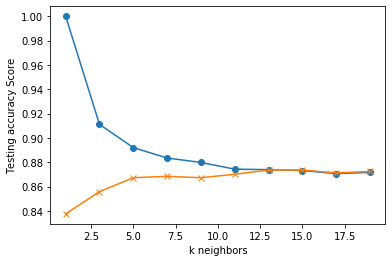

In [83]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [84]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.874


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)